<IPython.core.display.Math object>

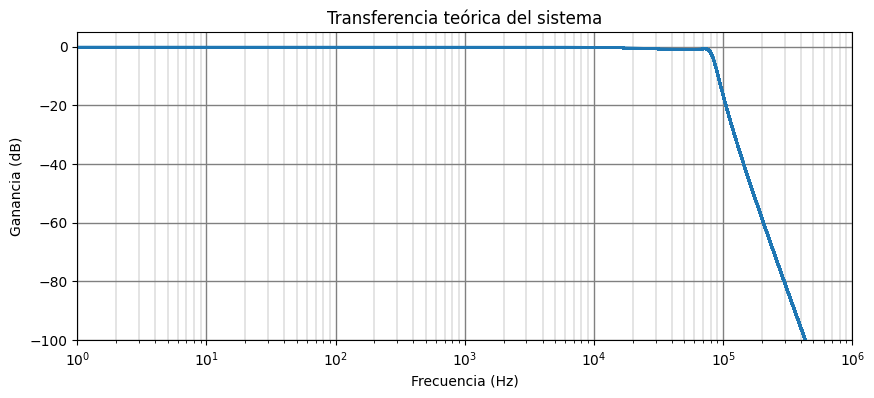

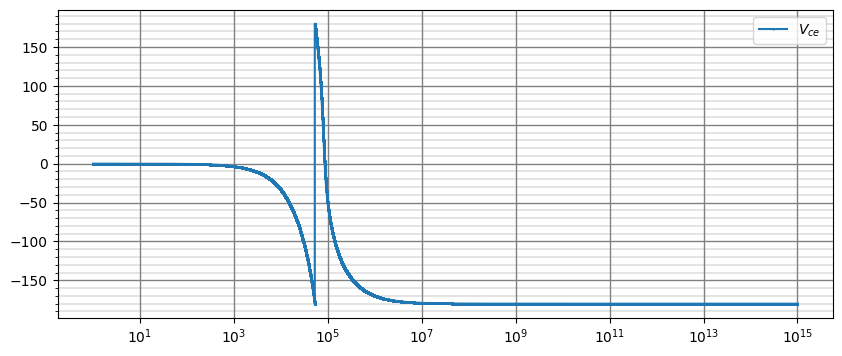

In [6]:

from sympy import pretty
from IPython.display import display, Math
import scipy.signal as signal
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt 

#Constantes

import matplotlib.pyplot as plt 
R1, R2, C1, C2,R12, R22, C12, C22,R13, R23, C13, C23, f = sp.symbols('R1, R2, C1, C2,R12, R22, C12, C22,R13, R23, C13, C23, f', Real=True)
s= sp.symbols('s')
#.param r1= 1000 r2= 3300 c1= 10n c2= 120p r12= 1000 r22= 3300 c12= 3.3n c22= 560p r13= 1000 r23= 3300 c13= 2.2n c23= 1.5n
a1= R1*R2*C1*C2
b1=(R1*C2)+(R2*C2)
c1=1

H1=1/((s*s*(a1))+s*(b1)+(c1))

a2=R12*R22*C12*C22
b2= (R12*C22)+(R22*C22)
c2=1

H2=1/((s*s*(a2))+s*(b2)+(c2))

a3=R13*R23*C13*C23
b3= (R13*C23)+(R23*C23)
c3=1

H3=1/((s*s*(a3))+s*(b3)+(c3))

Ht= H1*H2*H3
printt = sp.latex(Ht)
display(Math(printt))

Hs=sp.simplify(Ht)

Hjw=Hs.subs(s, sp.I*(f*2*np.pi))

Hs_func=sp.lambdify([R1, R2, C1, C2,R12, R22, C12, C22,R13, R23, C13, C23, f], Hjw, 'numpy')
wrange= np.logspace(0,15, int(1e6), base=10)
func_posta= Hs_func(1000, 3300, 10e-9, 120e-12, 1000, 3300, 3.3e-9, 560e-12, 1000, 3300, 2.2e-9, 1.5e-9, wrange)
func_posta_arg= np.angle(func_posta)
func_posta_abs= np.abs(func_posta)

ax_bode, ax_bode = plt.subplots(figsize=(10,4))
fase_bode, fase_bode = plt.subplots(figsize=(10,4))
ax_bode.semilogx(wrange,20 * np.log10(np.abs(func_posta_abs)),'p-' , label='$V_{ce}$', markersize=0.5)
fase_bode.semilogx(wrange,np.degrees(func_posta_arg),'p-' , label='$V_{ce}$', markersize=0.5)
ax_bode.set(xlabel='Frecuencia (Hz)', ylabel='Ganancia (dB)', title='Transferencia teórica del sistema')
plt.minorticks_on()
ax_bode.set_xlim(10**0,10**6)
ax_bode.set_ylim(-100,5)
#fase_bode.set_ylim(-180,0)
plt.minorticks_on()
ax_bode.grid(visible=True, which='both', axis='both',color='gray',linewidth=0.3)
ax_bode.grid(visible=True, which='major', axis='both',color='gray',linewidth=1)
fase_bode.grid(visible=True, which='both', axis='both',color='gray',linewidth=0.3)
fase_bode.grid(visible=True, which='major', axis='both',color='gray',linewidth=1)
plt.legend()
plt.show()